In [1]:
import numpy as np
import pandas as pd
from math import sqrt, pi
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

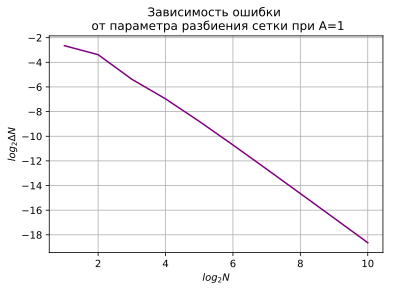

In [2]:
def f(ksi, A=1):
    '''
    0 <= ksi < 1
    A - const, по дефолту 1
    '''
    return A*ksi / sqrt(1 - ksi**2)


def integral(function=np.exp, Ksi=[0, 1], N=2, a=1):
    '''
    function - интегрируемая функция, по дефолту экспонента
    ksi - отрезок, по дефолту [0, 1)
    N - параметр сетки, по дефолту 2
    a - const, по дефолту 1
    '''
    ksi_ = np.linspace(*Ksi, N+1) # делим отрезок на N частей, получая N+1 точку (Правую границу не рассматриваем)
    xx = [f(ksi, A=a) for ksi in ksi_[:N]] # x = f(ksi, A=1)
    
    h_ksi = 1/N # шаг по ksi
    h_x = [a / (1 - (ksi_[n] + h_ksi/2)**2)**(3/2) * 1/N for n in range(N)] # шаг по x
    
    integral_x = sqrt(pi) / 2 # точное решение для e^(-x^2)
    integral_xx = sum([h_x[n] * function(-(xx[n] + h_x[n]/2)**2) for n in range(N)]) # численное решение
    return integral_x, integral_xx


# зависимость ошибки от N
delta_N, I_acc, I_app = [], [], []
N_list = [2**x for x in range(1, 11)]
for n in N_list:
    integral_acc, integral_app = integral(N=n)
    error = abs(integral_acc - integral_app)
    I_acc.append(integral_acc)
    I_app.append(integral_app)
    delta_N.append(error)
    
fig, ax = plt.subplots()
ax.plot(np.log2(N_list), np.log2(delta_N), color='purple')
ax.set_title('Зависимость ошибки \n от параметра разбиения сетки при А=1')
ax.set_xlabel('$log_2N$')
ax.set_ylabel('$log_2\Delta N$')
ax.grid(True)
plt.show()

fig.savefig('График_лаб2.png')

In [3]:
df = pd.DataFrame({'$N$': N_list, '$I_{точ}$': I_acc, 
                   '$I_{пр}$': I_app, '$\Delta N$': delta_N})
df

,$N$,$I_{точ}$,$I_{пр}$,$\Delta N$
0,2,0.886227,0.727041,0.159186
1,4,0.886227,0.790305,0.095922
2,8,0.886227,0.862175,0.024052
3,16,0.886227,0.878232,0.007995
4,32,0.886227,0.883970,0.002257
5,64,0.886227,0.885629,0.000598
6,128,0.886227,0.886074,0.000153
7,256,0.886227,0.886188,0.000039
8,512,0.886227,0.886217,0.000010
9,1024,0.886227,0.886224,0.000002
